In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the data
data1 = pd.read_csv("Databourg/data1.csv", sep = ",")
# Display the first few rows of the data
print(data1.head())
print("")
# Summary statistics of the numerical columns
print(data1.info())
print("")
# Check for missing values
print(data1.isnull().sum())

# Convert timestamp column to datetime
data1["timestamp_utc"] = pd.to_datetime(data1["timestamp_utc"])

               timestamp_utc  FWD (C/N)  rain_intensity_rg
0  2020-11-01 00:00:00+00:00        5.9                0.0
1  2020-11-01 00:05:00+00:00        5.9                0.0
2  2020-11-01 00:10:00+00:00        5.9                0.0
3  2020-11-01 00:15:00+00:00        5.8                0.0
4  2020-11-01 00:20:00+00:00        5.5                0.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26784 entries, 0 to 26783
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp_utc      26784 non-null  object 
 1   FWD (C/N)          26223 non-null  float64
 2   rain_intensity_rg  26784 non-null  float64
dtypes: float64(2), object(1)
memory usage: 627.9+ KB
None

timestamp_utc          0
FWD (C/N)            561
rain_intensity_rg      0
dtype: int64


In [ ]:
# Create new columns for time, hour, day, month, and season
data1['time'] = data1['timestamp_utc'].dt.time
data1['hour'] = data1['timestamp_utc'].dt.hour
data1['day'] = data1['timestamp_utc'].dt.day
data1['month'] = data1['timestamp_utc'].dt.month

labels = ['Winter', 'Spring', 'Summer', 'Autumn']

# Assign season based on the month
data1['season'] = pd.cut(data1['month'], bins=[0, 2, 5, 8, 11], labels=labels)
#data1.loc[data1['season'].isna(), 'season'] = 'Unknown'
data1['month'] = data1['timestamp_utc'].dt.month_name().str[:3]

column_order = ['timestamp_utc', 'hour', 'time', 'day', 'month', 'season', 'FWD (C/N)', 'rain_intensity_rg']
data1 = data1[column_order]

data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26784 entries, 0 to 26783
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   timestamp_utc      26784 non-null  datetime64[ns, UTC]
 1   hour               26784 non-null  int64              
 2   time               26784 non-null  object             
 3   day                26784 non-null  int64              
 4   month              26784 non-null  object             
 5   season             26784 non-null  category           
 6   FWD (C/N)          26223 non-null  float64            
 7   rain_intensity_rg  26784 non-null  float64            
dtypes: category(1), datetime64[ns, UTC](1), float64(2), int64(2), object(2)
memory usage: 1.5+ MB


In [ ]:
# Define custom order for 'day', 'month', and 'season'
day_order = np.arange(1, 31)
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']

# Convert the columns to the Categorical data type with the specified order
data1['day'] = pd.Categorical(data1['day'], categories=day_order, ordered=True)
data1['month'] = pd.Categorical(data1['month'], categories=month_order, ordered=True)
data1['season'] = pd.Categorical(data1['season'], categories=season_order, ordered=True)

# Print the DataFrame with the categorical columns and custom order
data1.head()

data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26784 entries, 0 to 26783
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   timestamp_utc      26784 non-null  datetime64[ns, UTC]
 1   hour               26784 non-null  int64              
 2   time               26784 non-null  object             
 3   day                26208 non-null  category           
 4   month              26784 non-null  category           
 5   season             26784 non-null  category           
 6   FWD (C/N)          26223 non-null  float64            
 7   rain_intensity_rg  26784 non-null  float64            
dtypes: category(3), datetime64[ns, UTC](1), float64(2), int64(1), object(1)
memory usage: 1.1+ MB


In [ ]:
#Normalize C/N and rain intensity
from sklearn.preprocessing import MinMaxScaler

# Select only the numerical columns
numerical_columns = ['FWD (C/N)', 'rain_intensity_rg']
df_numerical = data1[numerical_columns]

# Normalize the numerical columns
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_numerical), columns=numerical_columns)

# Concatenate the normalized numerical columns with the non-numerical columns
data1 = pd.concat([data1.drop(columns=numerical_columns), df_normalized], axis=1)
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26784 entries, 0 to 26783
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   timestamp_utc      26784 non-null  datetime64[ns, UTC]
 1   hour               26784 non-null  int64              
 2   time               26784 non-null  object             
 3   day                26208 non-null  category           
 4   month              26784 non-null  category           
 5   season             26784 non-null  category           
 6   FWD (C/N)          26223 non-null  float64            
 7   rain_intensity_rg  26784 non-null  float64            
dtypes: category(3), datetime64[ns, UTC](1), float64(2), int64(1), object(1)
memory usage: 1.1+ MB


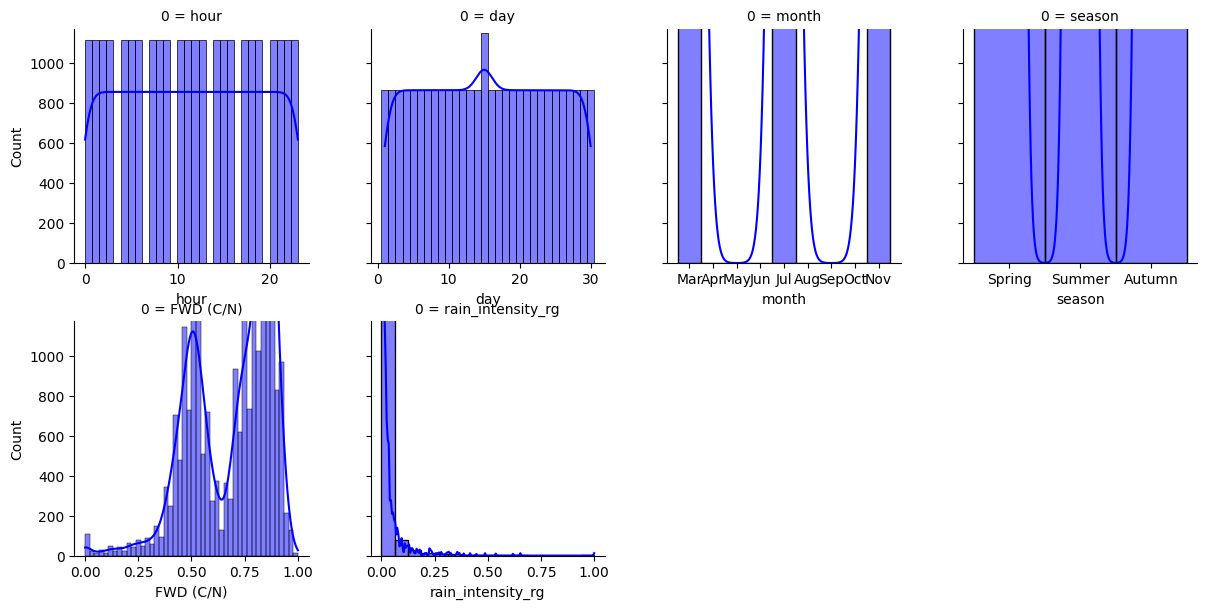

In [ ]:
datac = data1[['hour', 'day', 'month', 'season', 'FWD (C/N)', 'rain_intensity_rg']].copy()

g = sns.FacetGrid(pd.DataFrame(datac.columns), col=0, col_wrap=4, sharex=False)

for ax, x_var in zip(g.axes, datac.columns):
    sns.histplot(data=datac, x=x_var, ax=ax, alpha=0.5, color='b', kde=True)
    ax.set_ylim(0, None)

#g.tight_layout()

plt.show()


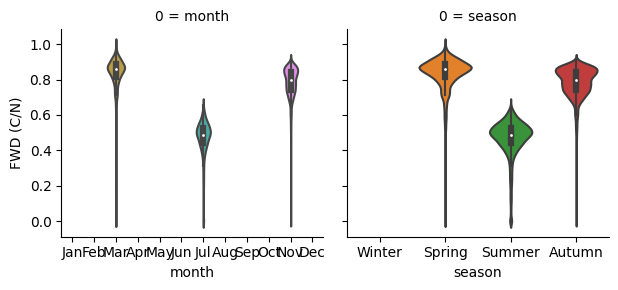

In [ ]:
datac = data1[['month', 'season', 'FWD (C/N)']].copy()

#coding = {'No, never': 1, 'Yes, once': 2, 'Yes, twice': 3, 'Yes 3 times or more': 4}
#ncdata_ordinal['been_pregnant_before'] =  ncdata_ordinal['been_pregnant_before'].replace(coding)

#coding = {'Elementary school': 1, 'High school': 2, 'Trade/technical/vocational training': 3, 'University': 4, 'PhD': 5}
#ncdata_ordinal['education'] =  ncdata_ordinal['education'].replace(coding)

g = sns.FacetGrid(pd.DataFrame(datac.columns[:-1]), col=0, col_wrap=4, sharex=False)
for ax, x_var in zip(g.axes, datac.columns[:-1]):
    sns.violinplot(data=datac, x=x_var, y='FWD (C/N)', ax=ax)
g.tight_layout()

plt.show()


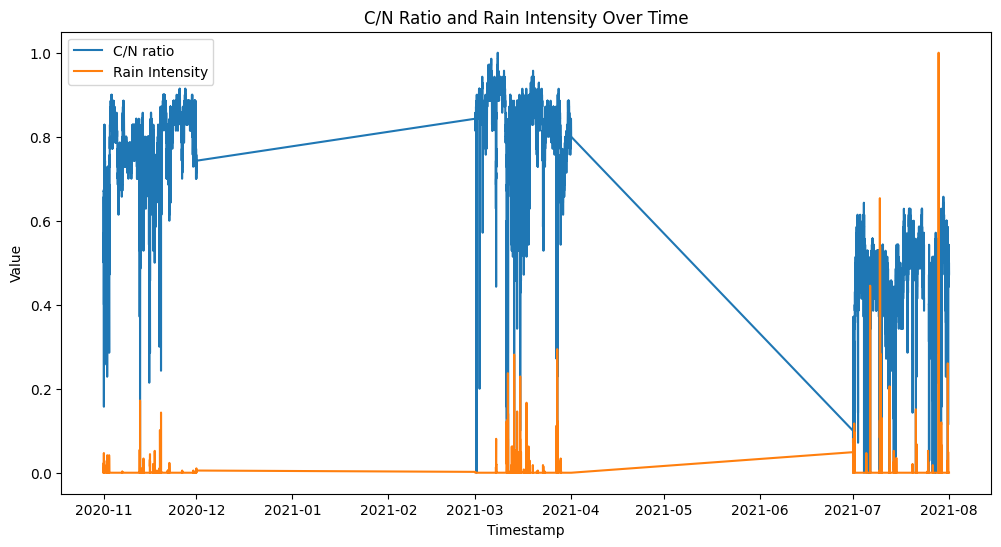

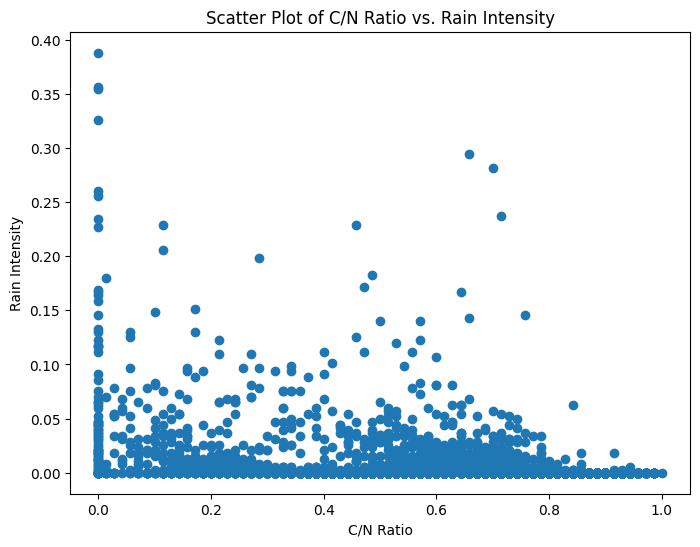

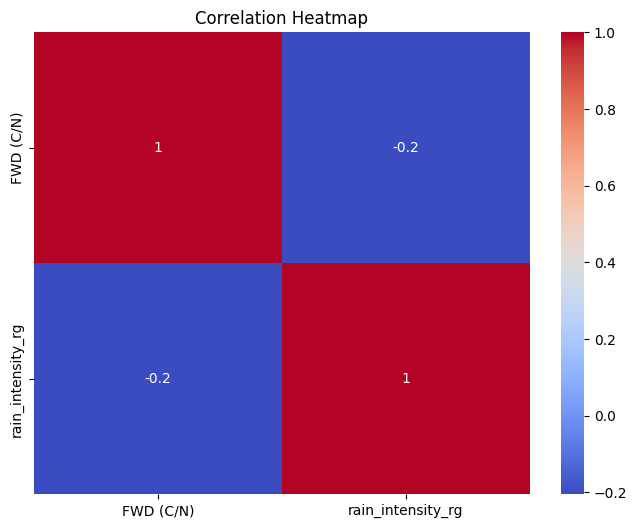

C/N Ratio:
Mean: 0.6971568034604302
Median: 0.7714285714285716
Standard Deviation: 0.1874400329932375

Rain Intensity:
Mean: 0.0014179373663489342
Median: 0.0
Standard Deviation: 0.015714733239790415


In [ ]:
# Line plot of C/N ratio and rain intensity over time
plt.figure(figsize=(12, 6))
plt.plot(data1["timestamp_utc"], data1["FWD (C/N)"], label="C/N ratio")
plt.plot(data1["timestamp_utc"], data1["rain_intensity_rg"], label="Rain Intensity")
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.title("C/N Ratio and Rain Intensity Over Time")
plt.legend()
plt.show()

# Scatter plot of C/N ratio vs. rain intensity
plt.figure(figsize=(8, 6))
plt.scatter(data1["FWD (C/N)"], data1["rain_intensity_rg"])
plt.xlabel("C/N Ratio")
plt.ylabel("Rain Intensity")
plt.title("Scatter Plot of C/N Ratio vs. Rain Intensity")
plt.show()


# Correlation heatmap
correlation = data1[["FWD (C/N)", "rain_intensity_rg"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# Calculate the mean, median, and standard deviation of C/N ratio
cn_mean = data1["FWD (C/N)"].mean()
cn_median = data1["FWD (C/N)"].median()
cn_std = data1["FWD (C/N)"].std()

# Calculate the mean, median, and standard deviation of rain intensity
rain_mean = data1["rain_intensity_rg"].mean()
rain_median = data1["rain_intensity_rg"].median()
rain_std = data1["rain_intensity_rg"].std()

print("C/N Ratio:")
print("Mean:", cn_mean)
print("Median:", cn_median)
print("Standard Deviation:", cn_std)
print()
print("Rain Intensity:")
print("Mean:", rain_mean)
print("Median:", rain_median)
print("Standard Deviation:", rain_std)


In [ ]:
# Data analysis for the missing data

datanull = data1[data1['FWD (C/N)'].isnull()].copy()

print(datanull.head())
print("")
# Summary statistics of the numerical columns
print(datanull.info())
print("")
# Check for missing values
print(datanull.shape)
np.sum(data1[['FWD (C/N)']].isna())

                 timestamp_utc  hour      time day month  season  FWD (C/N)  \
1883 2020-11-07 12:55:00+00:00    12  12:55:00   7   Nov  Autumn        NaN   
2446 2020-11-09 11:50:00+00:00    11  11:50:00   9   Nov  Autumn        NaN   
2447 2020-11-09 11:55:00+00:00    11  11:55:00   9   Nov  Autumn        NaN   
2448 2020-11-09 12:00:00+00:00    12  12:00:00   9   Nov  Autumn        NaN   
2449 2020-11-09 12:05:00+00:00    12  12:05:00   9   Nov  Autumn        NaN   

      rain_intensity_rg  
1883                0.0  
2446                0.0  
2447                0.0  
2448                0.0  
2449                0.0  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561 entries, 1883 to 26668
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   timestamp_utc      561 non-null    datetime64[ns, UTC]
 1   hour               561 non-null    int64              
 2   time          

FWD (C/N)    561
dtype: int64

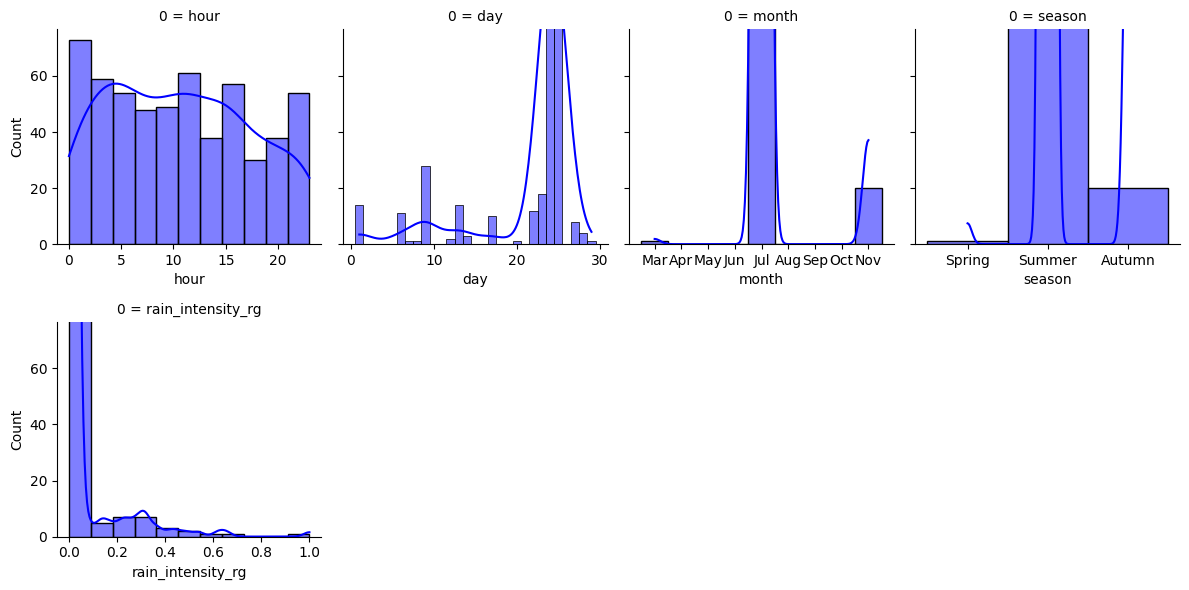

In [ ]:
#NO data visualization

datac = datanull[['hour', 'day', 'month', 'season', 'rain_intensity_rg']].copy()


g = sns.FacetGrid(pd.DataFrame(datac.columns), col=0, col_wrap=4, sharex=False)

for ax, x_var in zip(g.axes, datac.columns):
    sns.histplot(data=datac, x=x_var, ax=ax, alpha=0.5, color='b', kde=True)
    ax.set_ylim(0, None)

g.tight_layout()

plt.show()


In [121]:
# Import necessary libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [132]:
# Step 1: Read Data
train_data = pd.read_csv('./Databourg/data1.csv', sep = ',')
test_data = pd.read_csv('./Databourg/data2.csv', sep = ',')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26784 entries, 0 to 26783
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp_utc      26784 non-null  object 
 1   FWD (C/N)          26223 non-null  float64
 2   rain_intensity_rg  26784 non-null  float64
dtypes: float64(2), object(1)
memory usage: 627.9+ KB


In [133]:
# Step 2: Data Preprocessing and Cleaning, Normalization
# Remove rows with missing C/N values
#train_data = train_data.fillna(train_data['FWD (C/N)'].min(), inplace=True)
#test_data = test_data.fillna(test_data['FWD (C/N)'].min(), inplace=True)


df_numerical = train_data[numerical_columns]
# Normalize the numerical columns
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_numerical), columns=numerical_columns)
# Concatenate the normalized numerical columns with the non-numerical columns
train_data = pd.concat([train_data.drop(columns=numerical_columns), df_normalized], axis=1)
train_data

df_numerical = test_data[numerical_columns]
# Normalize the numerical columns
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_numerical), columns=numerical_columns)
# Concatenate the normalized numerical columns with the non-numerical columns
test_data = pd.concat([test_data.drop(columns=numerical_columns), df_normalized], axis=1)

train_data = train_data.dropna(subset=['FWD (C/N)'])
test_data = test_data.dropna(subset=['FWD (C/N)'])

In [134]:
# Step 3: Prepare Data for LSTM
def prepare_data(data, history_length):
    X, y = [], []
    for i in range(history_length, len(data)):
        X.append(data['FWD (C/N)'].iloc[i - history_length:i].values)
        y.append(data['rain_intensity_rg'].iloc[i])
    return np.array(X), np.array(y)

history_length = 24  # Use a 2-hour history
train_X, train_y = prepare_data(train_data, history_length)
test_X, test_y = prepare_data(test_data, history_length)

# Convert the input arrays to float32
train_X = train_X.astype('float32')
train_y = train_y.astype('float32')
test_X = test_X.astype('float32')
test_y = test_y.astype('float32')

In [135]:
# Step 4: Define LSTM Model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=64, return_sequences=True), input_shape=(history_length, 1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=32)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=1))


In [136]:
# Step 5: Train and test the LSTM Model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')


In [ ]:
n_iter = 10
for i in range(n_iter):
  #needs data augmentation
  model.fit(train_X, train_y, epochs=10, batch_size=32)

In [141]:
# Step 6: Evaluate the Model
predictions = model.predict(test_X)
mse = mean_squared_error(test_y, predictions)
mae = mean_absolute_error(test_y, predictions)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

842/842 [==============================] - 12s 14ms/step
Mean Squared Error: 0.00013939582
Mean Absolute Error: 0.0020118793


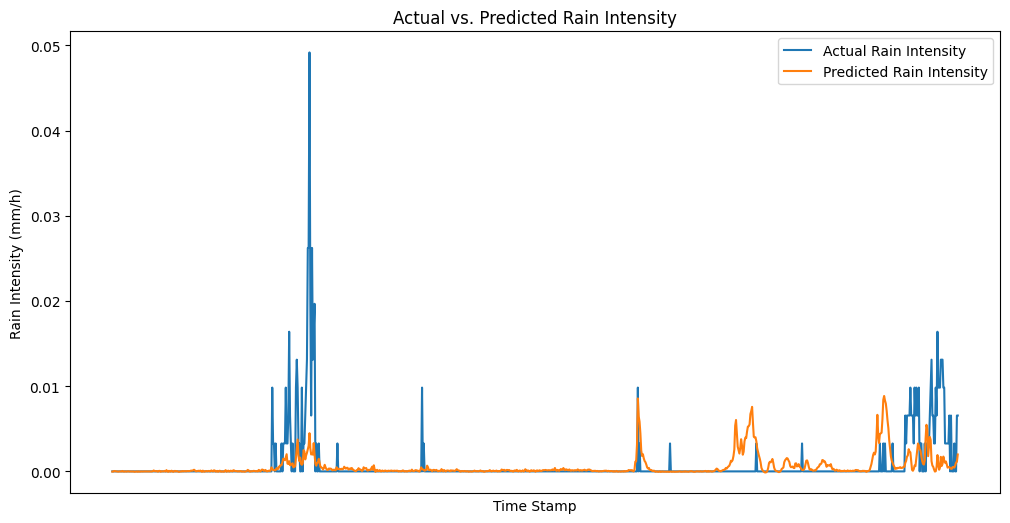

In [142]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(test_data['timestamp_utc'].iloc[history_length:][:1000], test_y[:1000], label='Actual Rain Intensity')
plt.plot(test_data['timestamp_utc'].iloc[history_length:][:1000], predictions[:1000], label='Predicted Rain Intensity')
plt.xlabel('Time Stamp')
plt.ylabel('Rain Intensity (mm/h)')
plt.title('Actual vs. Predicted Rain Intensity')
plt.legend()
plt.xticks([])

# Enable interactive mode and show the plot
plt.ion()
plt.show(block=False)
plt.pause(0.001)